In [16]:
!pip install contextily

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import numpy as np
import contextily as ctx
import matplotlib.pyplot as plt
import math
import seaborn as sns


# Carregar os conjuntos de dados
* df_bts contém informações sobre torres de comunicação
* df_test_alunos e df_train_alunos contêm dados dos alunos




In [17]:
df_bts = pd.read_csv('./Bts.csv')
df_test_alunos = pd.read_csv('./meds_test_alunos.csv')
df_train_alunos = pd.read_csv('./meds_train_alunos.csv')

# Remove a coluna 'ponto_id' dos datasets de treino e teste
test_ponto_id = df_test_alunos.pop('ponto_id')
train_ponto_id = df_train_alunos.pop('ponto_id')

### Remove colunas desnecessárias (nomes começando com 'Unnamed')


In [18]:
df_bts = df_bts.loc[:, ~df_bts.columns.str.contains('^Unnamed')]
df_bts

grupo    btsId btsNetNome      lat        lon  cch  azimuth    RssiId
0      1  BTS_1_1  PEMDL01_1 -8.04342 -34.952000  873        0  rssi_1_1
1      1  BTS_1_2  PEMDL01_2 -8.04342 -34.952000  872      120  rssi_1_2
2      1  BTS_1_3  PEMDL01_3 -8.04342 -34.952000  875      240  rssi_1_3
3      2  BTS_2_1  PEMDL08_1 -8.05289 -34.944672  865        0  rssi_2_1
4      2  BTS_2_2  PEMDL08_2 -8.05289 -34.944672  874      120  rssi_2_2
5      2  BTS_2_3  PEMDL08_3 -8.05289 -34.944672  871      240  rssi_2_3
6      3  BTS_3_1  PEMDL09_1 -8.05532 -34.957900  877        0  rssi_3_1
7      3  BTS_3_2  PEMDL09_2 -8.05532 -34.957900  881      120  rssi_3_2
8      3  BTS_3_3  PEMDL09_3 -8.05532 -34.957900  869      240  rssi_3_3

In [19]:
df_train_alunos = df_train_alunos.loc[:, ~df_train_alunos.columns.str.contains('^Unnamed')]
df_train_alunos


rssi_1_1    rssi_1_2    rssi_1_3    rssi_2_1    rssi_2_2    rssi_2_3  \
0    -103.705000 -110.425000 -107.381667 -110.330000 -108.345000 -106.590000   
1    -105.225000 -115.000000 -105.210000 -115.000000 -105.835000 -115.000000   
2    -102.610000 -115.000000 -101.380000 -115.000000 -104.295000  -97.360000   
3     -89.140000  -97.251429  -86.642857  -96.036667  -96.592500  -92.460000   
4    -109.088333 -107.200000 -107.010000 -108.430000 -104.845714 -101.435714   
...          ...         ...         ...         ...         ...         ...   
6770 -105.225000 -115.000000 -105.210000 -115.000000 -105.835000 -115.000000   
6771 -105.225000 -115.000000 -105.210000 -115.000000 -105.835000 -115.000000   
6772 -105.225000 -115.000000 -105.210000 -115.000000 -105.835000 -115.000000   
6773 -109.088333 -107.200000 -107.010000 -108.430000  -97.200000  -98.148571   
6774  -89.254286  -91.887143  -89.297143  -85.120000  -83.190000  -84.626190   

        rssi_3_1    rssi_3_2  rssi_3_3  delay_1  delay_2  delay_3       lat  \
0    -107.153333 -102.120000 -115.0000      5.0      3.0      2.0 -8.055786   
1     -88.470000  -94.024286 -108.1200      5.0      3.0      2.0 -8.055784   
2     -96.980000  -99.572500 -115.0000      5.0      3.0      2.0 -8.055506   
3     -86.813333 -102.688000  -87.2700      4.0      7.0      2.0 -8.050390   
4    -103.065000 -102.110000 -115.0000      5.0      3.0      2.0 -8.055380   
...          ...         ...       ...      ...      ...      ...       ...   
6770  -93.005000  -97.114286 -108.1200      5.0      3.0      2.0 -8.055784   
6771  -87.315000  -88.735714 -108.1200      5.0      3.0      2.0 -8.055784   
6772  -95.165000  -90.705714 -108.1200      5.0      3.0      2.0 -8.055784   
6773  -99.840000  -94.665000 -115.0000      5.0      3.0      2.0 -8.055380   
6774  -91.120000 -101.740000  -96.3725      5.0      3.0      3.0 -8.055320   

            lon  indoor  
0    -34.951505    True  
1    -34.951608    True  
2    -34.951693    True  
3    -34.959630   False  
4    -34.951736    True  
...         ...     ...  
6770 -34.951608    True  
6771 -34.951608    True  
6772 -34.951608    True  
6773 -34.951736    True  
6774 -34.951080   False  

[6775 rows x 15 columns]

In [20]:
df_test_alunos = df_test_alunos.loc[:, ~df_test_alunos.columns.str.contains('^Unnamed')]
df_test_alunos

rssi_1_1    rssi_1_2    rssi_1_3    rssi_2_1  rssi_2_2    rssi_2_3  \
0    -115.000000 -115.000000 -115.000000 -115.000000 -115.0000 -115.000000   
1    -115.000000 -115.000000 -115.000000 -115.000000 -115.0000 -115.000000   
2    -115.000000 -115.000000 -115.000000 -115.000000 -115.0000 -115.000000   
3    -115.000000 -115.000000 -115.000000 -115.000000 -115.0000 -115.000000   
4    -115.000000 -115.000000 -115.000000 -115.000000 -115.0000 -115.000000   
...          ...         ...         ...         ...       ...         ...   
2899  -78.377143  -93.530000  -74.481429  -89.900000  -94.2075  -85.220000   
2900  -79.580000  -84.140000  -74.481429  -95.280000  -94.1450  -93.030000   
2901  -77.652857 -101.310000  -79.640000  -93.238333  -99.8000  -93.584286   
2902  -77.367143  -89.474286  -79.270000  -97.160000  -98.4800  -94.844286   
2903  -79.520000  -89.868571  -71.890000  -97.040000  -92.1600  -94.717143   

       rssi_3_1    rssi_3_2  rssi_3_3  delay_1  delay_2  delay_3  
0    -90.930000  -84.113333 -115.0000      5.0      3.0      2.0  
1    -90.930000  -84.113333 -115.0000      5.0      3.0      2.0  
2    -90.930000  -86.090000 -115.0000      5.0      3.0      2.0  
3    -90.930000  -84.113333 -115.0000      5.0      3.0      2.0  
4    -90.930000  -84.113333 -115.0000      5.0      3.0      2.0  
...         ...         ...       ...      ...      ...      ...  
2899 -89.576667 -103.704000  -97.2200      1.0      4.0      4.0  
2900 -89.576667 -103.704000  -97.5000      1.0      4.0      4.0  
2901 -86.680000 -103.704000  -96.3650      1.0      4.0      4.0  
2902 -87.783333 -103.704000  -94.3275      1.0      4.0      5.0  
2903 -89.730000 -103.704000  -94.3275      1.0      4.0      5.0  

[2904 rows x 12 columns]

# Treinamento do modelo

In [21]:
# Define as variáveis independentes (X) e dependentes (y)
X = df_train_alunos.drop(columns=['lat', 'lon', 'indoor'])
y = df_train_alunos[['lat', 'lon', 'indoor']]

In [22]:
# Divide os dados em treino (80%) e validação (20%)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [23]:

!pip install optuna
import optuna
from sklearn.model_selection import cross_val_score

# Função de otimização
def objective(trial):
    # Define os hiperparâmetros que serão otimizados
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Define o modelo com os hiperparâmetros sugeridos
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Calcula a pontuação de validação cruzada
    score = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_mean_absolute_error').mean()
    return -score  # Maximizar a pontuação (mínimo erro)

# Cria o estudo Optuna
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Melhor configuração encontrada
print('Melhor conjunto de parâmetros:', study.best_params)


[I 2025-03-28 00:14:33,942] A new study created in memory with name: no-name-24156616-f7e3-4fb4-82c9-5f18cddce089
[I 2025-03-28 00:14:44,077] Trial 0 finished with value: 6.357914179618141e-05 and parameters: {'n_estimators': 173, 'max_depth': 37, 'min_samples_split': 12, 'min_samples_leaf': 9}. Best is trial 0 with value: 6.357914179618141e-05.
[I 2025-03-28 00:14:48,710] Trial 1 finished with value: 4.908378687629009e-05 and parameters: {'n_estimators': 84, 'max_depth': 38, 'min_samples_split': 11, 'min_samples_leaf': 6}. Best is trial 1 with value: 4.908378687629009e-05.
[I 2025-03-28 00:14:56,443] Trial 2 finished with value: 5.478136244569846e-05 and parameters: {'n_estimators': 96, 'max_depth': 14, 'min_samples_split': 18, 'min_samples_leaf': 1}. Best is trial 1 with value: 4.908378687629009e-05.
[I 2025-03-28 00:15:01,258] Trial 3 finished with value: 0.00010271781079204868 and parameters: {'n_estimators': 160, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 19}. Be

Melhor conjunto de parâmetros: {'n_estimators': 91, 'max_depth': 45, 'min_samples_split': 2, 'min_samples_leaf': 1}


In [24]:
# Define o modelo Random Forest com os hiperparâmetros
model = RandomForestRegressor(
    n_estimators=119,
    max_depth=35,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

In [25]:
# Treina o modelo com os dados de treino
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=35, n_estimators=119, random_state=42)

In [26]:
# Faz a predição sobre os dados de validação
y_pred = model.predict(X_val)

In [27]:
# Avaliação do modelo
model.score(X_val, y_val)


0.9984852152714437

In [28]:
# Predição da variável indoor (ambiente interno ou externo)
y_indoors_pred = y_pred[:,2]

print("Accuracy:", accuracy_score(y_val['indoor'], y_indoors_pred == 1))

Accuracy: 1.0


# Visualização dos resultados no mapa

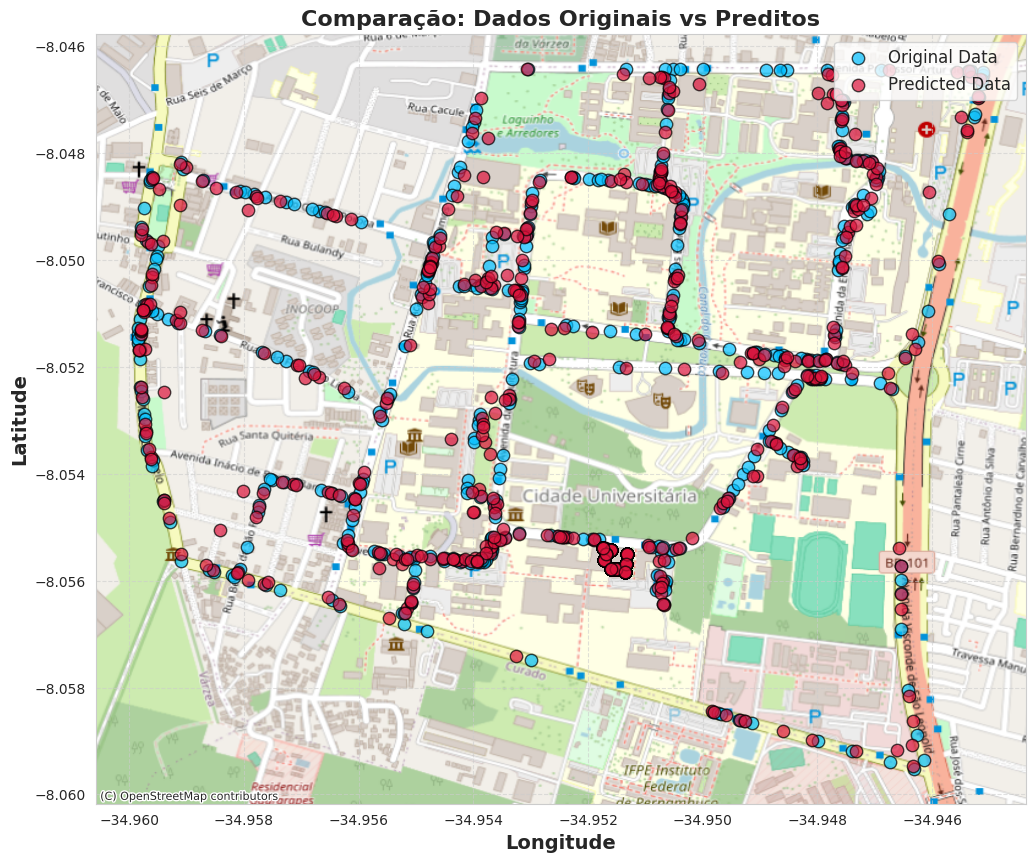

In [29]:
import seaborn as sns

# Configura o estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

plt.scatter(y_val['lon'], y_val['lat'],
            color='deepskyblue', edgecolors='black',
            label='Original Data', alpha=0.7, s=80)

plt.scatter(y_pred[:,1], y_pred[:,0],
            color='crimson', edgecolors='black',
            label='Predicted Data', alpha=0.7, s=80)

ctx.add_basemap(plt.gca(), crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Configura os rótulos e título do gráfico
plt.xlabel('Longitude', fontsize=14, fontweight='bold')
plt.ylabel('Latitude', fontsize=14, fontweight='bold')
plt.title('Comparação: Dados Originais vs Preditos', fontsize=16, fontweight='bold')
plt.legend(frameon=True, fontsize=12, loc='upper right')
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Cálculo da distância entre pontos

In [30]:
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371000
    return c * r
distances = haversine(y_val['lat'], y_val['lon'], y_pred[:,0], y_pred[:,1])

In [31]:
# Estatísticas das distâncias
print(f"Mean Distance: {np.mean(distances):.2f} meters")
print(f"Max Distance: {np.max(distances):.2f} meters")
print(f"Min Distance: {np.min(distances):.2f} meters")
print(f"Standard Deviation of Distance: {np.std(distances):.2f} meters")

Mean Distance: 6.09 meters
Max Distance: 192.53 meters
Min Distance: 0.00 meters
Standard Deviation of Distance: 16.80 meters


In [42]:
# Estatísticas dos erros
error_stats = {
    "Erro médio (m)": np.mean(distances),
    "Erro mínimo (m)": np.min(distances),
    "Erro máximo (m)": np.max(distances),
    "Desvio padrão do erro (m)": np.std(distances)
}

print(pd.DataFrame([error_stats]))

   Erro médio (m)  Erro mínimo (m)  Erro máximo (m)  Desvio padrão do erro (m)
0        6.088555     1.768308e-10       192.530816                  16.795973


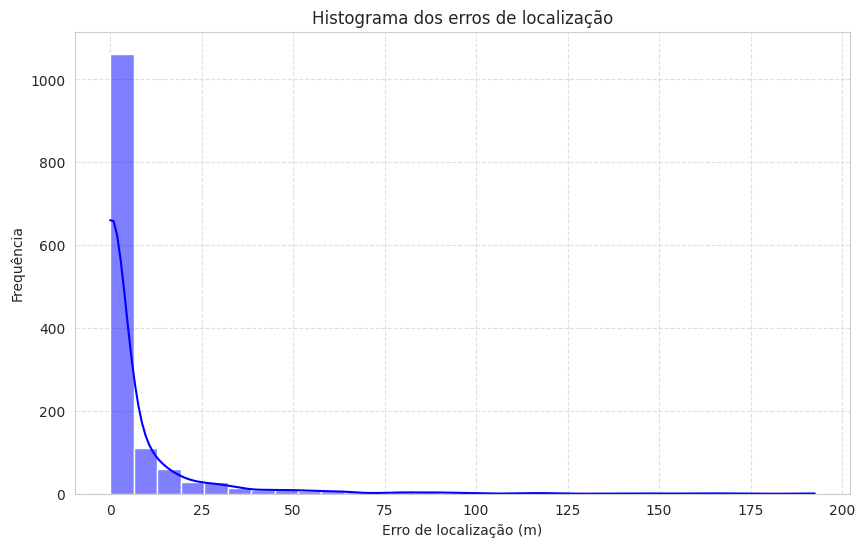

In [43]:
# Plot do histograma dos erros
plt.figure(figsize=(10, 6))
sns.histplot(distances, bins=30, kde=True, color='blue')
plt.xlabel("Erro de localização (m)")
plt.ylabel("Frequência")
plt.title("Histograma dos erros de localização")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

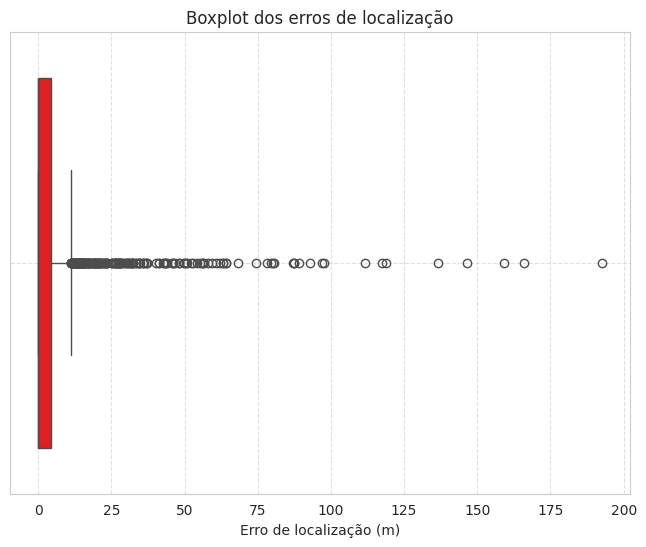

In [44]:
# Boxplot dos erros
plt.figure(figsize=(8, 6))
sns.boxplot(x=distances, color='red')
plt.xlabel("Erro de localização (m)")
plt.title("Boxplot dos erros de localização")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

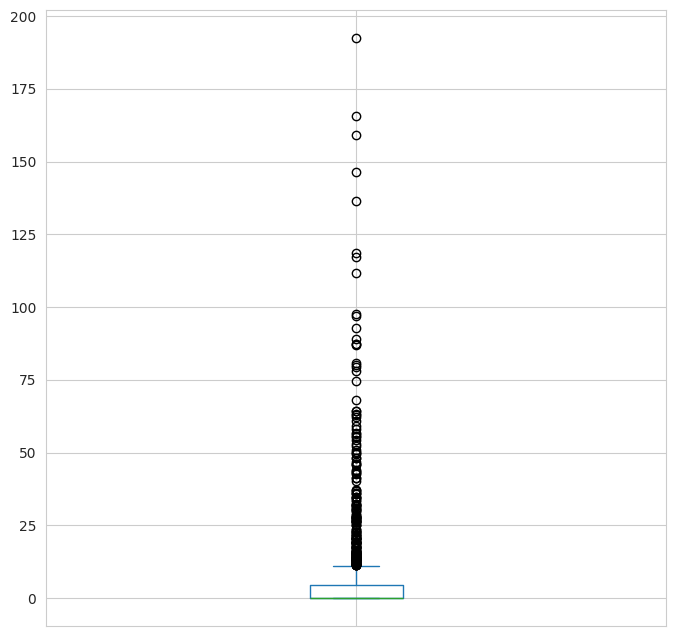

In [33]:
plt.figure(figsize=(8, 8))
distances.plot(kind='box')
plt.show()

# Predição para os dados de teste

In [34]:
# Faz predição nos dados de teste
X_test = df_test_alunos[X_train.columns] # Select only the columns used during training
y_test_pred = model.predict(X_test)

In [35]:
# Extrai as coordenadas preditas
lat_test_pred = y_test_pred[:, 0]
lon_test_pred = y_test_pred[:, 1]
indoor_test_pred = y_test_pred[:, 2]

In [36]:
# Adiciona os resultados ao dataframe de teste
df_test_alunos['lat_pred'] = lat_test_pred
df_test_alunos['lon_pred'] = lon_test_pred
df_test_alunos['indoor_pred'] = indoor_test_pred

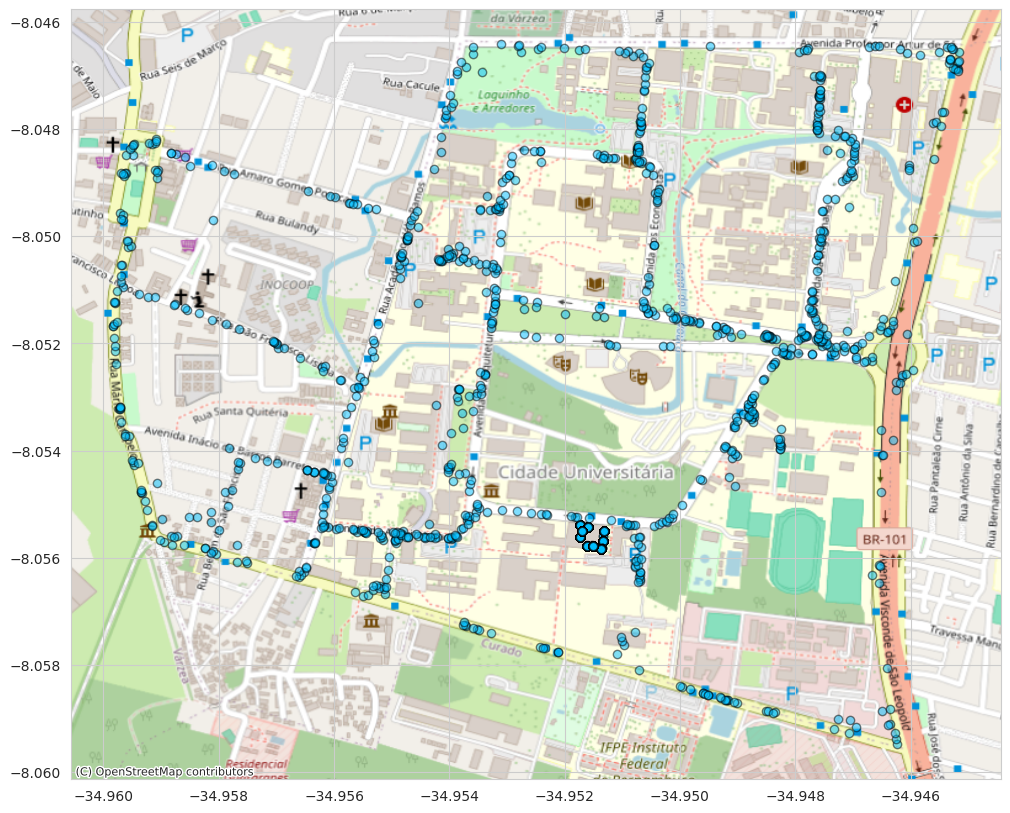

In [37]:
plt.figure(figsize=(12, 10))

# Original Data (azul com bordas brancas)
plt.scatter(lon_test_pred, lat_test_pred,
            color='deepskyblue', edgecolors='black',
            label='Original Data', alpha=0.5)

ctx.add_basemap(plt.gca(), crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

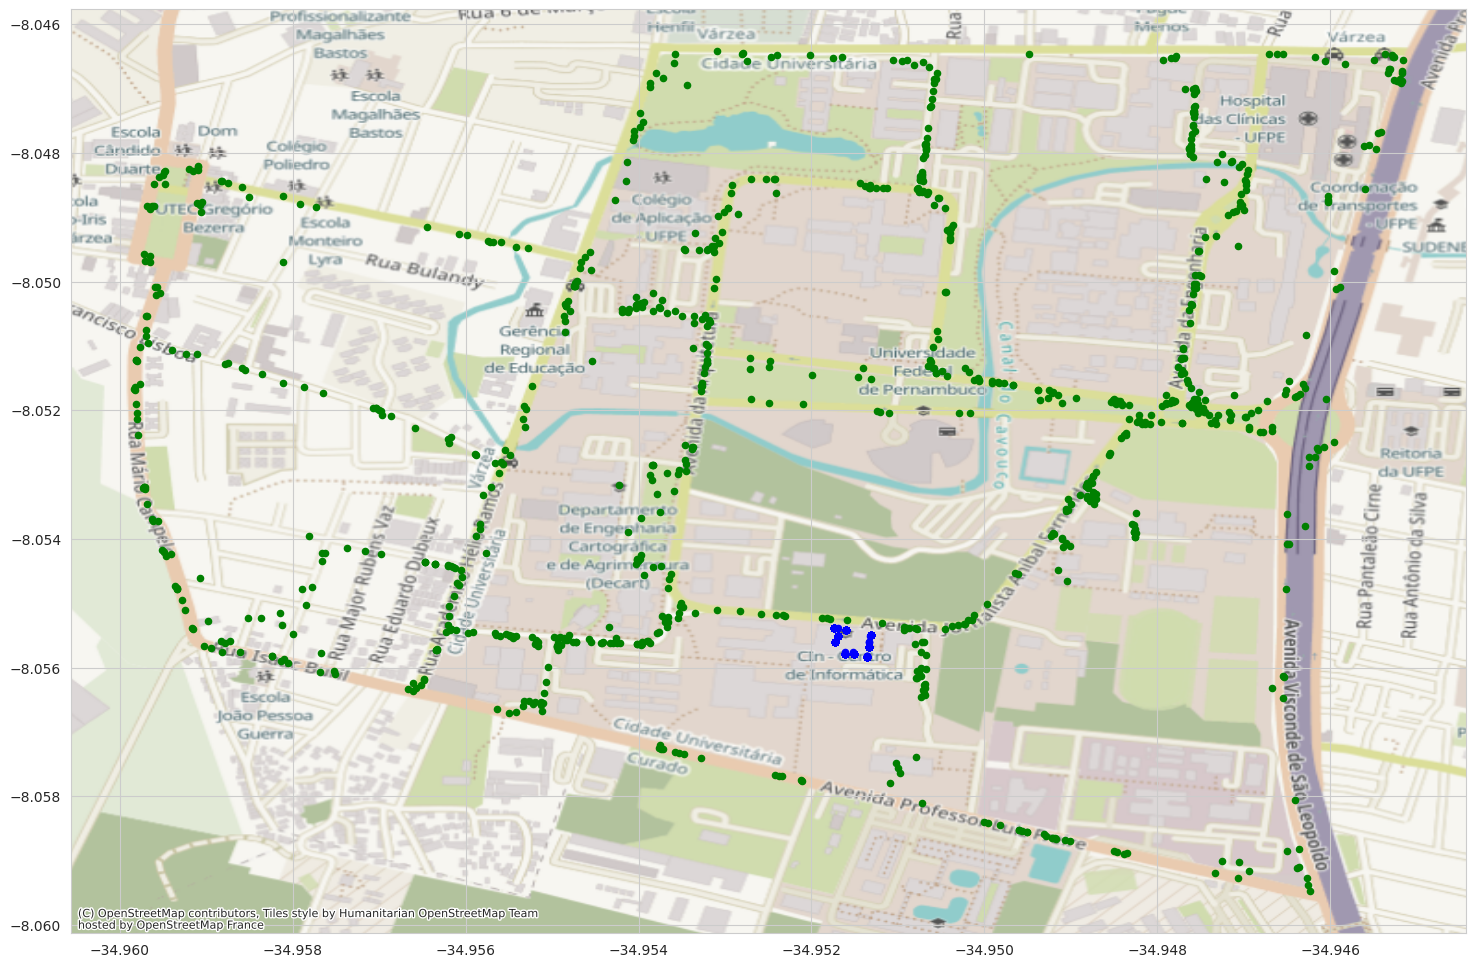

In [38]:
fig, subs = plt.subplots()

df_test_indoors = df_test_alunos[df_test_alunos['indoor_pred'] == True]
df_test_indoors

df_test_outdoors = df_test_alunos[df_test_alunos['indoor_pred'] == False]
df_test_outdoors

subs.scatter(df_test_indoors['lon_pred'], df_test_indoors['lat_pred'], color='blue', s = 20)
subs.scatter(df_test_outdoors['lon_pred'], df_test_outdoors['lat_pred'], color='green', s = 20)
ctx.add_basemap(plt.gca(), crs='EPSG:4326')

plt.gcf().set_size_inches((18,12))
plt.show()

In [39]:
norm = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
df_test_alunos['delay_1_norm'] = norm(df_test_alunos['delay_1'])
df_test_alunos['delay_2_norm'] = norm(df_test_alunos['delay_2'])
df_test_alunos['delay_3_norm'] = norm(df_test_alunos['delay_3'])
df_test_alunos['color'] = df_test_alunos.apply(lambda row: (row['delay_1_norm'], row['delay_2_norm'], row['delay_3_norm']), axis=1)

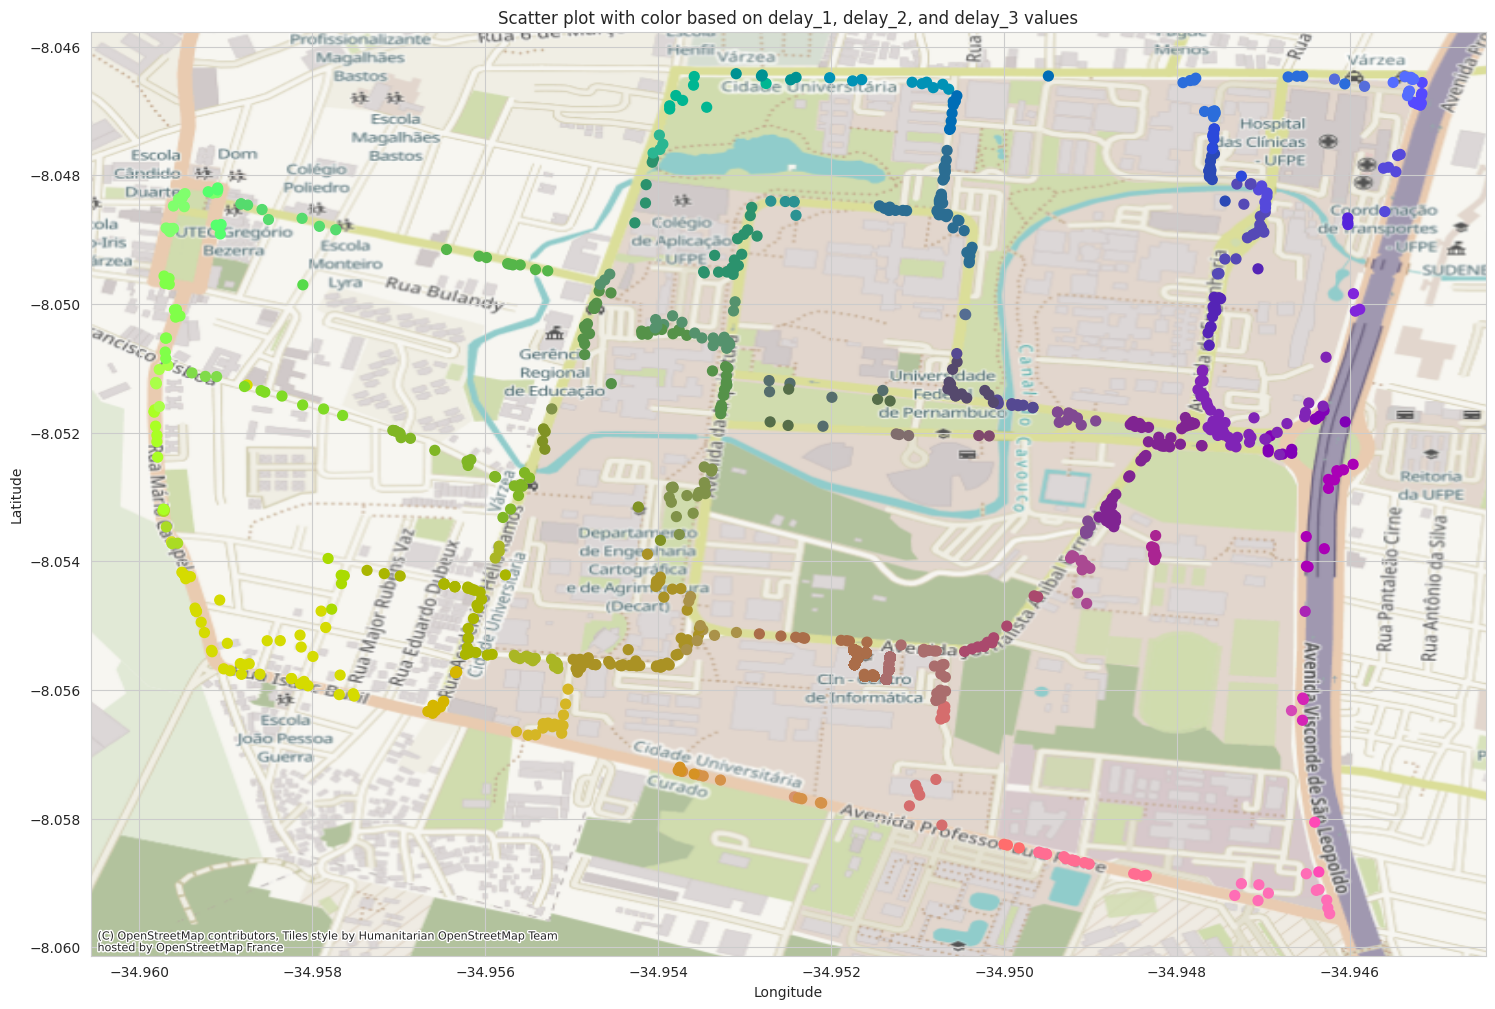

In [40]:
plt.scatter(df_test_alunos['lon_pred'], df_test_alunos['lat_pred'], color= df_test_alunos['color'], s=50)
ctx.add_basemap(plt.gca(), crs='EPSG:4326')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot with color based on delay_1, delay_2, and delay_3 values')

plt.gcf().set_size_inches((18,12))
plt.show()

In [46]:
# Salva os resultados em um arquivo CSV
df_test_alunos['ponto_id'] = test_ponto_id
df_result = df_test_alunos[['ponto_id', 'lat_pred', 'lon_pred', 'indoor_pred']]
df_result.to_csv('./Resultados_Equipe1_Metodorandomforest.csv')